In [2]:
import pandas as pd

df = pd.read_csv('student_performance_dirty.csv')
print("dataset loaded successfully!")
df.head()

dataset loaded successfully!


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Notes
0,7.0,99,Yes,9.0,1,91.0,excellent
1,4.0,82,No,4.0,2,65.0,review
2,8.0,a,Yes,7.0,2,45.0,review
3,5.0,52,Yes,5.0,2,36.0,excellent
4,7.0,75,No,8.0,5,66.0,review


### Exploratory Data Analysis (EDA)

In [3]:
df.shape

(10005, 7)

In [4]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index',
       'Notes'],
      dtype='object')

In [5]:
df.dtypes

Hours Studied                       float64
Previous Scores                      object
Extracurricular Activities           object
Sleep Hours                         float64
Sample Question Papers Practiced      int64
Performance Index                   float64
Notes                                object
dtype: object

In [6]:
df.isnull().sum()

Hours Studied                       1032
Previous Scores                        0
Extracurricular Activities             0
Sleep Hours                          496
Sample Question Papers Practiced       0
Performance Index                      0
Notes                                  0
dtype: int64

In [7]:
df.duplicated().sum()

44

In [8]:
# remove incorrect rows with string value in "previous score" column
df[df['Previous Scores'].str.contains('[a-zA-Z]')]
# remove the second row
df = df.drop(2)

In [9]:
df.dtypes

Hours Studied                       float64
Previous Scores                      object
Extracurricular Activities           object
Sleep Hours                         float64
Sample Question Papers Practiced      int64
Performance Index                   float64
Notes                                object
dtype: object

In [10]:
df['Previous Scores'] = df['Previous Scores'].astype('int64')

In [11]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Notes
0,7.0,99,Yes,9.0,1,91.0,excellent
1,4.0,82,No,4.0,2,65.0,review
3,5.0,52,Yes,5.0,2,36.0,excellent
4,7.0,75,No,8.0,5,66.0,review
5,3.0,78,No,9.0,6,61.0,excellent


In [12]:
df['Hours Studied'].fillna(df['Hours Studied'].mean(), inplace=True)
df['Sleep Hours'].fillna(df['Sleep Hours'].mean(), inplace=True)


In [13]:
df.dropna(subset=['Previous Scores'], inplace=True)

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.drop(columns="Notes", inplace=True)

In [16]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [17]:
df.duplicated().sum()

54

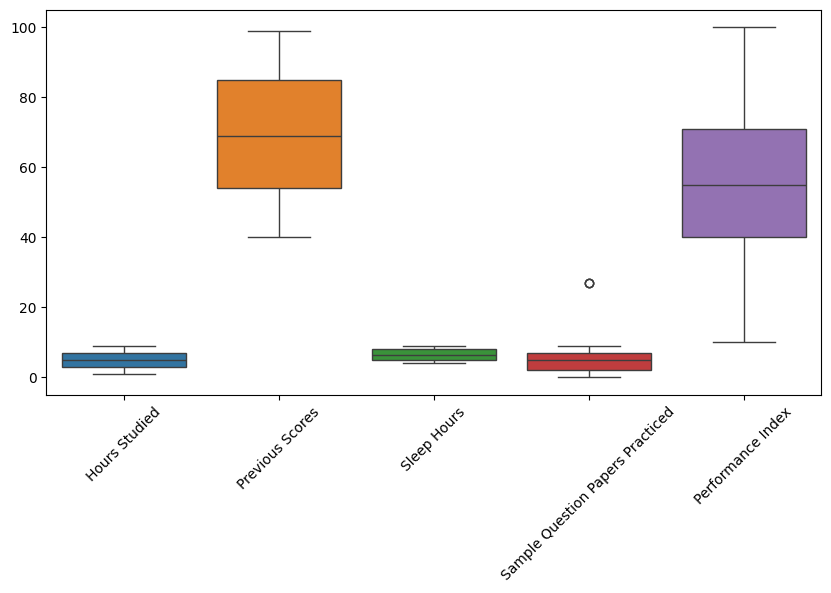

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot box plot for all columns
plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()


In [26]:
df['Sample Question Papers Practiced'].quantile(0.50)

5.0

In [22]:
import numpy as np

upper_limit = df['Sample Question Papers Practiced'].quantile(0.95)
# df = df[df['Sample Question Papers Practiced'] < upper_limit]
df['Sample Question Papers Practiced'] = np.where(df['Sample Question Papers Practiced'] > upper_limit, upper_limit, df['Sample Question Papers Practiced'])


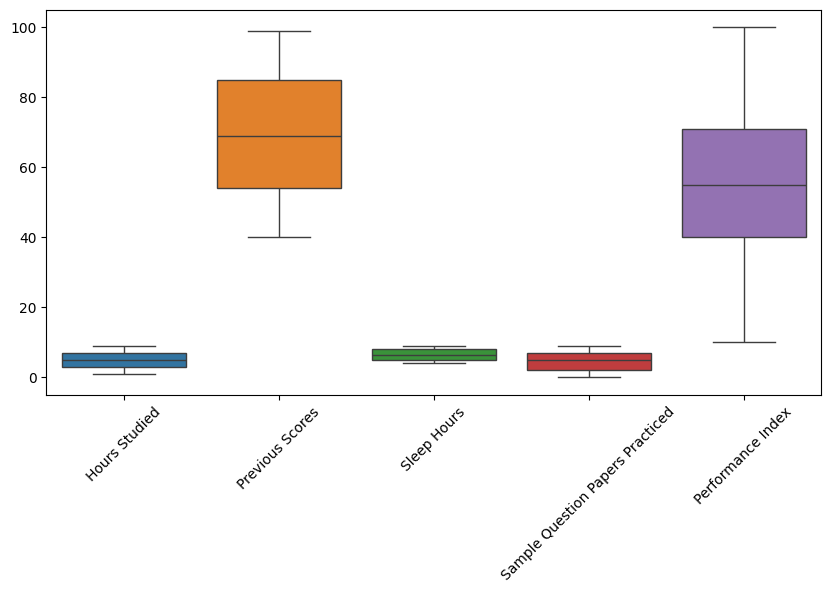

In [23]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()
